Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [9]:
library(tidymodels)



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [10]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [11]:
glimpse(diabetes_train)


Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 10, 4, 10, 1, 3, 8, 1, 13, 5, 6, 10,…
$ Glucose                  <dbl> 85, 89, 116, 115, 110, 139, 103, 126, 99, 97,…
$ BloodPressure            <dbl> 66, 66, 74, 0, 92, 80, 30, 88, 84, 66, 82, 75…
$ SkinThickness            <dbl> 29, 23, 0, 0, 0, 0, 38, 41, 0, 15, 19, 26, 0,…
$ Insulin                  <dbl> 0, 94, 0, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 35.3, 37.6, 27.1, 43.3, 39.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.134, 0.191, 1.441, 0.1…
$ Age                      <dbl> 31, 21, 30, 29, 30, 57, 33, 27, 50, 22, 57, 6…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

The most suitable outcome variable in your logistic regression model is Outcome, as it represents the binary classification of diabetes (0 = No, 1 = Yes).


❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test             |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

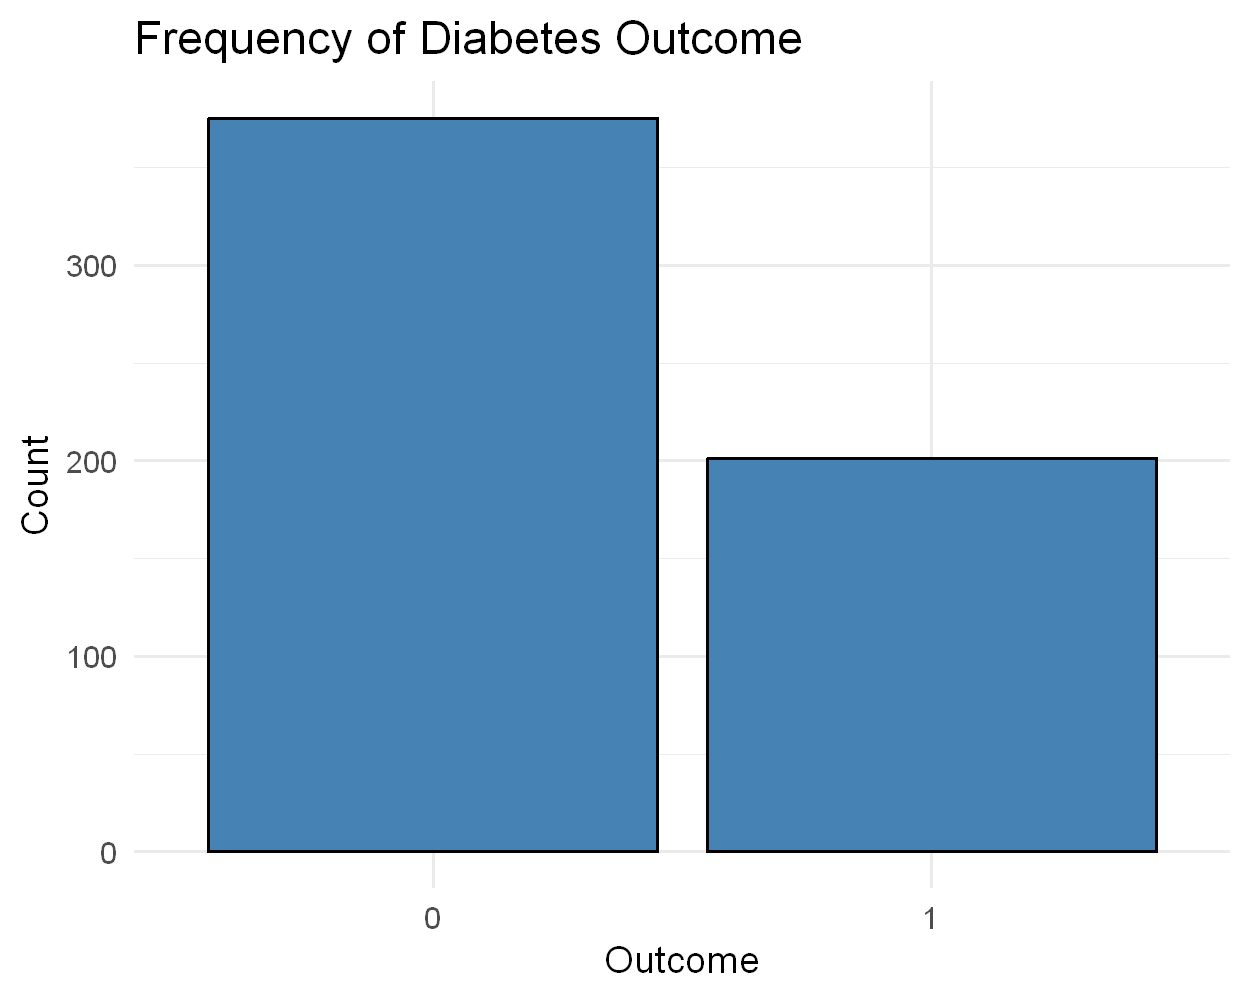

In [12]:
library(ggplot2)

ggplot(diabetes_train, aes(x = Outcome)) +
  geom_bar(fill = "steelblue", color = "black") +
  labs(title = "Frequency of Diabetes Outcome",
       x = "Outcome",
       y = "Count") +
  theme_minimal()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, It's not balanced. There are more No than Yes



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [13]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

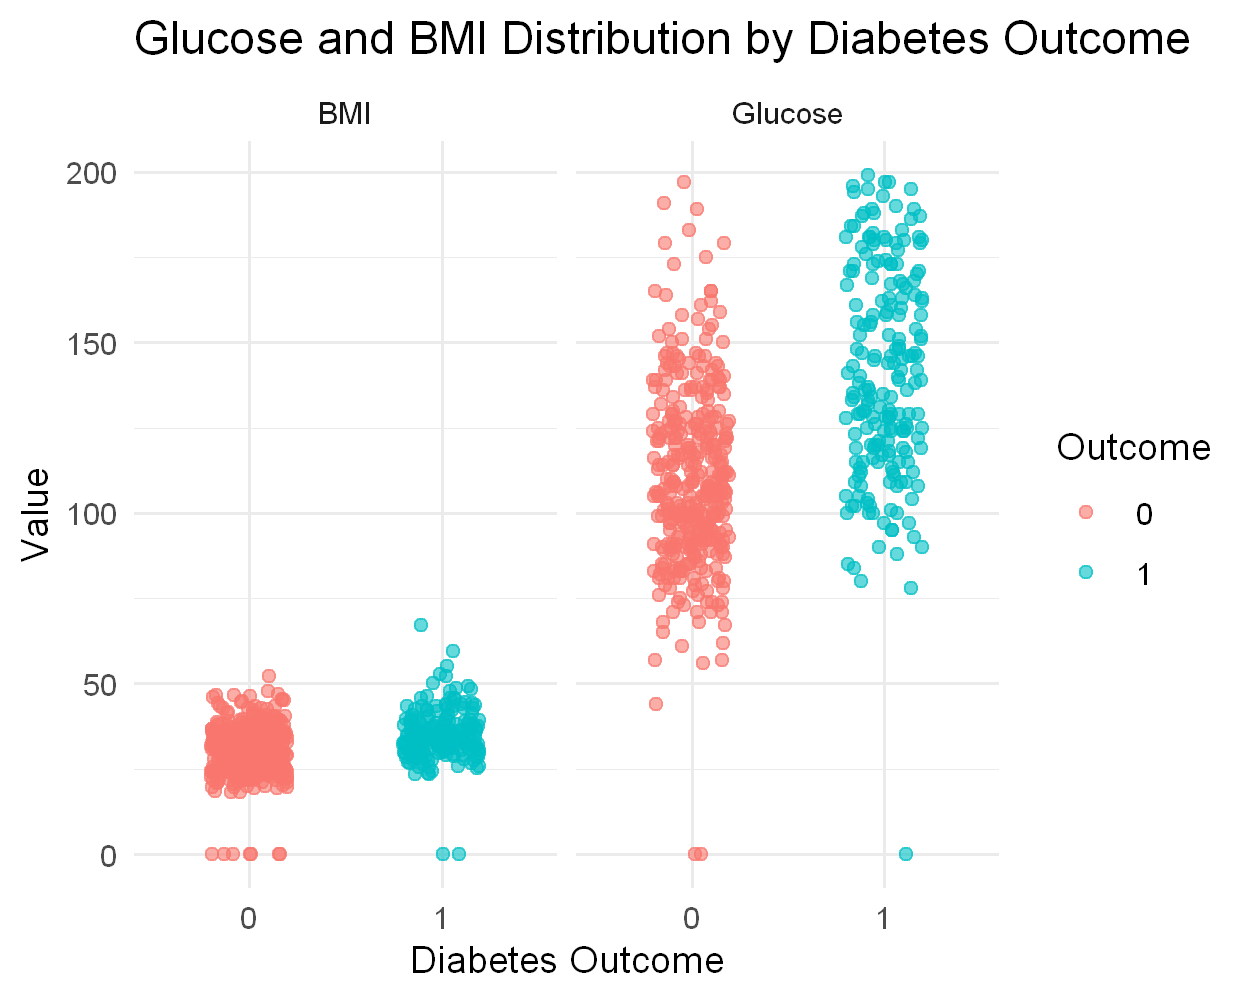

In [14]:
ggplot(plot_df, aes(x = Outcome, y = value, color = Outcome)) +
  geom_jitter(width = 0.2, alpha = 0.6) +
  facet_wrap(~name, ncol = 2, scales = 'free_x') +
  labs(title = "Glucose and BMI Distribution by Diabetes Outcome",
       x = "Diabetes Outcome",
       y = "Value") +
  theme_minimal()



❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

The x-axis scale will be fixed across all facets rather than adjusting independently for each variable.


Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [15]:
log_model <- glm(Outcome ~ BMI + Glucose, data = diabetes_train, family = binomial())

summary(log_model)



Call:
glm(formula = Outcome ~ BMI + Glucose, family = binomial(), data = diabetes_train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.436182   0.699114 -10.637  < 2e-16 ***
BMI          0.072256   0.015310   4.719 2.37e-06 ***
Glucose      0.035816   0.003822   9.371  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 745.11  on 575  degrees of freedom
Residual deviance: 579.96  on 573  degrees of freedom
AIC: 585.96

Number of Fisher Scoring iterations: 4


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [16]:
library(broom)

diabetes_test_wPred <- augment(log_model, new_data = diabetes_test)

head(diabetes_test_wPred)

Outcome,BMI,Glucose,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,26.6,85,-2.4698066,-0.4030196,0.003194961,1.006789,0.0000906777,-0.4036649
0,28.1,89,-2.2181584,-0.4545036,0.003186764,1.006750,0.0001163234,-0.4552295
0,25.6,116,-1.4317601,-0.6545445,0.003895332,1.006557,0.0003126135,-0.6558231
0,35.3,115,-0.7666969,-0.8735498,0.002908722,1.006265,0.0004530425,-0.8748230
0,37.6,110,-0.7795900,-0.8688762,0.004124030,1.006272,0.0006356505,-0.8706734
0,27.1,139,-0.4996041,-0.9738855,0.005077259,1.006102,0.0010374187,-0.9763673


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [22]:
diabetes_test_wPred <- diabetes_test_wPred %>%
  mutate(Outcome = factor(Outcome, levels = c(0, 1), labels = c("No", "Yes")))

diabetes_test_wPred |> conf_mat(truth = Outcome, estimate = .pred_class)

          Truth
Prediction  No Yes
       No  355 120
       Yes  20  81

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

- Total individuals with diabetes: 20 (False Negatives) + 81 (True Positives) = 101
- Correctly predicted as having diabetes: 81 (True Positives)
- Incorrectly predicted to have diabetes (False Positives): 120



This means the model identified some diabetic cases correctly but also misclassified a number of non-diabetic individuals. 
